# Data visualisation on the SSDD dataset

In [194]:
from typing import List

from torchvision.transforms import ToTensor
from torchvision.datasets import CocoDetection
import torch

import numpy as np
from matplotlib import pyplot as plt, patches

## Some helper function

In [195]:
def convert_bbox_from_COCO_to_pytorch(bbox: List) -> List:
    """
    Convert COCO bbox format to a pytorch format
    In coco format, bbox = [x_min, y_min, width, height]
    In pytorch, the input should be [x_min, y_min, x_max, y_max]

    :param bbox: box in the COCO format
    :return: (x_min, y_min, x_max, y_max)
    """
    return [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]


def convert_bbox_from_pytorch_to_COCO(bbox: List) -> List:
    """
    Convert pytorch bbox format to a COCO format
    In coco format, bbox = [x_min, y_min, width, height]
    In pytorch, the input should be [x_min, y_min, x_max, y_max]

    :param bbox: box in the pytorch format
    :return: (x_min, y_min, width, height)
    """
    return [bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]]


def convertAnnFile(ann):
    """
    Convert annotation file from COCO format to PyTorch

    :param ann:
    :return:
    """
    for el in ann:
        el['bbox'] = convert_bbox_from_COCO_to_pytorch(el['bbox'])
    return ann

## Show image with bbox

In [196]:
def show_bbox_on_images(image: np.ndarray, bboxes: List[np.ndarray], title='Ground true'):
    fig, ax = plt.subplots()        # Create figure and axes
    plt.title(title)
    plt.axis('off')
    ax.imshow(1 - image)    # Display the image
    for bbox in bboxes:
        # Create rectangle
        top_left_corner = np.array([int(bbox[0]), int(bbox[1])])
        width, height = int(bbox[2]), int(bbox[3])
        rect = patches.Rectangle(top_left_corner, width, height, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.show()

In [197]:
data_root = '../data/SSDD/'            # root dir of the dataset

# Loading training data
training_data = CocoDetection(root=data_root + 'images/train',
                              annFile=data_root + 'annotations/train.json',
                              transform=ToTensor())


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


[{'area': 843.8957475994514, 'iscrowd': 0, 'image_id': 954, 'bbox': [159.25925925925927, 246.41975308641977, 51.85185185185185, 27.90123456790124], 'category_id': 0, 'id': 1362, 'ignore': 0, 'segmentation': [[187.65432098765433, 268.8888888888889, 197.53086419753086, 267.1604938271605, 205.679012345679, 264.1975308641975, 211.11111111111111, 257.77777777777777, 209.38271604938274, 250.6172839506173, 204.19753086419755, 246.41975308641977, 196.79012345679013, 247.65432098765433, 187.90123456790124, 250.12345679012347, 179.25925925925927, 253.33333333333334, 172.83950617283952, 256.2962962962963, 167.1604938271605, 259.01234567901236, 161.7283950617284, 262.46913580246917, 159.25925925925927, 268.641975308642, 162.22222222222223, 274.320987654321, 171.11111111111111, 274.0740740740741, 178.27160493827162, 271.60493827160496]]}, {'area': 430.11736015851227, 'iscrowd': 0, 'image_id': 954, 'bbox': [218.0246913580247, 71.11111111111111, 20.0, 35.55555555555556], 'category_id': 0, 'id': 1363,

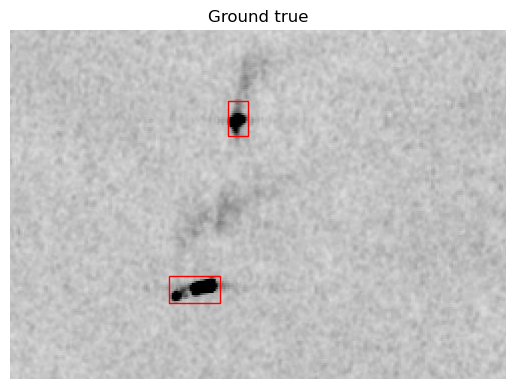

In [198]:
img, label = training_data[np.random.randint(0, len(training_data))]
img = img.permute([1, 2, 0])        # fit to the matplotlib format
img = img.numpy()

bboxes = [el['bbox'] for el in label]
print(label)
show_bbox_on_images(img, bboxes)

In [199]:
for k, (img, label) in enumerate(training_data):
    img = img.permute([1, 2, 0])
    img = img.numpy()

    bboxes = [el['bbox'] for el in label]

    print(f"Number of ship : {len(bboxes)}")

Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 3
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 3
Number of ship : 2
Number of ship : 2
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 2
Number of ship : 1
Number of ship : 3
Number of ship : 1
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of ship : 2
Number of ship : 1
Number of ship : 1
Number of ship : 1
Number of ship : 2
Number of sh

## Looking for the mean and the std of the dataset

In [200]:
def compute_mean_std(image, axis=(0, 1)):
    return np.mean(image, axis=axis), np.std(image, axis=axis)

In [213]:
# print((img[:, :, 0] == img[:, :, 1]).all())
# print((img[:, :, 0] == img[:, :, 2]).all())

psum, psum_sq = torch.tensor([0.]), torch.tensor([0.])
count = 0
shape = []
for k, (img, label) in enumerate(training_data):
    count += img.shape[1] * img.shape[2]
    psum += img[0, :, :].sum(axis=[0, 1])
    psum_sq += (img[0, :, :]**2).sum(axis=[0, 1])
    shape.append(img.shape)

mean = psum / count
var = (psum_sq / count) - (mean**2)
std = torch.sqrt(var)

print(mean, std)

torch.Size([3, 355, 501])
torch.Size([3, 403, 500])
torch.Size([3, 332, 502])
torch.Size([3, 317, 420])
torch.Size([3, 357, 501])
torch.Size([3, 322, 417])
torch.Size([3, 313, 404])
torch.Size([3, 324, 441])
torch.Size([3, 308, 462])
torch.Size([3, 331, 499])
torch.Size([3, 310, 408])
torch.Size([3, 258, 385])
torch.Size([3, 283, 427])
torch.Size([3, 354, 500])
torch.Size([3, 318, 389])
torch.Size([3, 345, 366])
torch.Size([3, 338, 367])
torch.Size([3, 311, 405])
torch.Size([3, 285, 408])
torch.Size([3, 333, 394])
torch.Size([3, 325, 414])
torch.Size([3, 325, 437])
torch.Size([3, 310, 480])
torch.Size([3, 295, 404])
torch.Size([3, 281, 422])
torch.Size([3, 332, 498])
torch.Size([3, 305, 437])
torch.Size([3, 345, 443])
torch.Size([3, 335, 397])
torch.Size([3, 324, 434])
torch.Size([3, 311, 386])
torch.Size([3, 311, 404])
torch.Size([3, 325, 411])
torch.Size([3, 398, 475])
torch.Size([3, 323, 433])
torch.Size([3, 314, 429])
torch.Size([3, 301, 455])
torch.Size([3, 287, 419])
torch.Size([